<a href="https://colab.research.google.com/github/shacktemp/My-Old-Louisville-Home/blob/main/house_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How Afford is Louisville Housing**
by Walter N. Shackelford

How accessible is housing in Louisville? That is an important way to see how the economic healthier of the area. To help answer this question we will be using CSVs data from Consumer Financial Protection Bureau. First, we will utilize the data to setup dataframes that reveal what the profile for the typical home owner was as of 2021. The criteria used to create the profile is head of household (HH) age, HH race, HH sex, and family status. We will compare home ownership demographics to overall Louisville area population demographics to see if they are equally diverse. My hypothis is that house ownership will be less diverse than the population. 

This is the data set we will be using: 
https://ffiec.cfpb.gov/data-browser/data/2021?category=counties&items=21111, I picked the 2021 set.

#Setup the enviroment

First import tools need for this project.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


#Access CSV

To access the CSV downloaded from GitHub first mount the Google drive, then selct the housingtwo.csv file:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Review Data

Once the CSV file is connect to the this Google Colab Notebook, preview the data by reading it in and printing it out:

In [ ]:
house_data_path = '/content/drive/MyDrive/Colab Notebooks/housingtwo.csv'
house_df = pd.read_csv(house_data_path)
print(house_df.head())

   activity_year                   lei  derived_msa-md state_code  \
0           2021  549300FGXN1K3HLB1R50           31140         KY   
1           2021  549300QO5LH5SP6I8C79           31140         KY   
2           2021  5493008NWHQT1R22C024           31140         KY   
3           2021  4LJGQ9KJ9S0CP4B1FY29           31140         KY   
4           2021  549300BRJZYHYKT4BJ84           31140         KY   

   county_code  census_tract conforming_loan_limit derived_loan_product_type  \
0        21111  2.111101e+10                     C   Conventional:First Lien   
1        21111  2.111101e+10                     C   Conventional:First Lien   
2        21111  2.111101e+10                     C   Conventional:First Lien   
3        21111  2.111101e+10                     C   Conventional:First Lien   
4        21111  2.111101e+10                     C   Conventional:First Lien   

              derived_dwelling_category        derived_ethnicity  ...  \
0  Single Family (1-4 Units):Si

#Closer Preview

Take a close look at columns headings and what type of informaiton is in each column to inform how to analyze:

In [ ]:
house_df = pd.read_csv(house_data_path)
house_df.columns
house_df.shape
house_df.info()
house_df.isnull().sum().sort_values(ascending=False)
house_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61248 entries, 0 to 61247
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             61248 non-null  int64  
 1   lei                                       61248 non-null  object 
 2   derived_msa-md                            61248 non-null  int64  
 3   state_code                                61248 non-null  object 
 4   county_code                               61248 non-null  int64  
 5   census_tract                              61202 non-null  float64
 6   conforming_loan_limit                     60972 non-null  object 
 7   derived_loan_product_type                 61248 non-null  object 
 8   derived_dwelling_category                 61248 non-null  object 
 9   derived_ethnicity                         61248 non-null  object 
 10  derived_race                      

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300FGXN1K3HLB1R50,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5245,3.05,75500,242,1912,2025,51
1,2021,549300QO5LH5SP6I8C79,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4015,19.28,75500,206,1443,1596,12
2,2021,5493008NWHQT1R22C024,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3506,48.29,75500,126,782,980,23
3,2021,4LJGQ9KJ9S0CP4B1FY29,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5245,3.05,75500,242,1912,2025,51
4,2021,549300BRJZYHYKT4BJ84,31140,KY,21111,2.111101e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,9.0,NaN,NaN,1983,14.52,75500,77,421,668,64


#Drop columns

To focus the analysis drop the columns that are not being used:

In [ ]:
house_df.drop(['derived_sex', 'action_taken', 'conforming_loan_limit', 'derived_loan_product_type','activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code', 'census_tract', 'derived_dwelling_category', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose', 'lien_status','reverse_mortgage','open-end_line_of_credit','business_or_commercial_purpose',"loan_to_value_ratio","rate_spread", "hoepa_status", "total_loan_costs", "total_points_and_fees", "origination_charges", "discount_points", "lender_credits", "loan_term", "prepayment_penalty_term", "intro_rate_period", "negative_amortization", "interest_only_payment", "balloon_payment", "other_nonamortizing_features", "construction_method", "occupancy_type", "manufactured_home_secured_property_type", "manufactured_home_land_property_interest", "total_units", "multifamily_affordable_units", "debt_to_income_ratio", "applicant_credit_score_type", "co-applicant_credit_score_type", "applicant_ethnicity-1", "applicant_ethnicity-2", "applicant_ethnicity-3", "applicant_ethnicity-4", "applicant_ethnicity-5", "co-applicant_ethnicity-1", "co-applicant_ethnicity-2", "co-applicant_ethnicity-3", "co-applicant_ethnicity-4", "co-applicant_ethnicity-5", "applicant_ethnicity_observed", "co-applicant_ethnicity_observed", "applicant_race-1", "applicant_race-2", "applicant_race-3", "applicant_race-4", "applicant_race-5", "co-applicant_race-1", "co-applicant_race-2", "co-applicant_race-3", "co-applicant_race-4", "co-applicant_race-5", "applicant_race_observed", "co-applicant_race_observed", "co-applicant_sex", "applicant_sex_observed", "co-applicant_sex_observed", "co-applicant_age", "applicant_age_above_62", "co-applicant_age_above_62", "submission_of_application", "initially_payable_to_institution", "aus-1", "aus-2", "aus-3", "aus-4", "aus-5", "denial_reason-1", "denial_reason-2", "denial_reason-3", "denial_reason-4", "tract_population", "tract_minority_population_percent", "tract_to_msa_income_percentage", "tract_owner_occupied_units", "tract_one_to_four_family_homes", "tract_median_age_of_housing_units"], axis=1, inplace=True )

In [ ]:
house_df.dropna(subset=['derived_ethnicity','derived_race', "applicant_sex", "applicant_age", 'loan_amount', 'interest_rate', 'property_value', 'income', 'ffiec_msa_md_median_family_income'], inplace=True)
house_df.sort_values(['derived_ethnicity'], ascending=[True], inplace=True)
house2_df = house_df.dropna()
house2_df

,derived_ethnicity,derived_race,loan_amount,interest_rate,property_value,income,applicant_sex,applicant_age,ffiec_msa_md_median_family_income
11,Ethnicity Not Available,White,155000.0,Exempt,Exempt,-91.0,1,45-54,75500
18681,Ethnicity Not Available,Race Not Available,105000.0,3.125,275000,53.0,2,45-54,75500
47755,Ethnicity Not Available,Asian,155000.0,2.25,495000,128.0,2,45-54,75500
47751,Ethnicity Not Available,Race Not Available,255000.0,3.125,385000,128.0,3,45-54,75500
7033,Ethnicity Not Available,Race Not Available,135000.0,2.75,145000,34.0,3,35-44,75500
...,...,...,...,...,...,...,...,...,...
24745,Not Hispanic or Latino,White,245000.0,2.75,325000,61.0,2,35-44,75500
24744,Not Hispanic or Latino,White,195000.0,2.875,215000,61.0,1,25-34,75500
24743,Not Hispanic or Latino,White,225000.0,2.75,225000,61.0,1,45-54,75500
24759,Not Hispanic or Latino,White,155000.0,3.75,215000,61.0,2,45-54,75500


#Find age

To compare the age of homeowners let extract the age out of the dataset and eliminate empty values:

In [ ]:
age_df = house2_df[["applicant_age"]]
age_df = age_df.dropna()
age_df

,applicant_age
11,45-54
18681,45-54
47755,45-54
47751,45-54
7033,35-44
...,...
24745,35-44
24744,25-34
24743,45-54
24759,45-54


In [ ]:
house_df = pd.read_csv(house_data_path)
house_df = house_df.apply (pd.to_numeric, errors='coerce')
house_df = house_df.dropna()
print (house_df)

Empty DataFrame
Columns: [activity_year, lei, derived_msa-md, state_code, county_code, census_tract, conforming_loan_limit, derived_loan_product_type, derived_dwelling_category, derived_ethnicity, derived_race, derived_sex, action_taken, purchaser_type, preapproval, loan_type, loan_purpose, lien_status, reverse_mortgage, open-end_line_of_credit, business_or_commercial_purpose, loan_amount, loan_to_value_ratio, interest_rate, rate_spread, hoepa_status, total_loan_costs, total_points_and_fees, origination_charges, discount_points, lender_credits, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, other_nonamortizing_features, property_value, construction_method, occupancy_type, manufactured_home_secured_property_type, manufactured_home_land_property_interest, total_units, multifamily_affordable_units, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_ethnicity-1, applican

In [ ]:
nullfree =  house_df.dropna()

print(nullfree)

Empty DataFrame
Columns: [activity_year, lei, derived_msa-md, state_code, county_code, census_tract, conforming_loan_limit, derived_loan_product_type, derived_dwelling_category, derived_ethnicity, derived_race, derived_sex, action_taken, purchaser_type, preapproval, loan_type, loan_purpose, lien_status, reverse_mortgage, open-end_line_of_credit, business_or_commercial_purpose, loan_amount, loan_to_value_ratio, interest_rate, rate_spread, hoepa_status, total_loan_costs, total_points_and_fees, origination_charges, discount_points, lender_credits, loan_term, prepayment_penalty_term, intro_rate_period, negative_amortization, interest_only_payment, balloon_payment, other_nonamortizing_features, property_value, construction_method, occupancy_type, manufactured_home_secured_property_type, manufactured_home_land_property_interest, total_units, multifamily_affordable_units, income, debt_to_income_ratio, applicant_credit_score_type, co-applicant_credit_score_type, applicant_ethnicity-1, applican

In [ ]:
nullfree =  house_df.dropna()
house_df['property_value']
house_df['property_value'].mean()

nan

In [ ]:
average_age = 
female_average_age =
male_average_age = 

SyntaxError: ignored

**bold text**#SOME CHART

<Axes: >

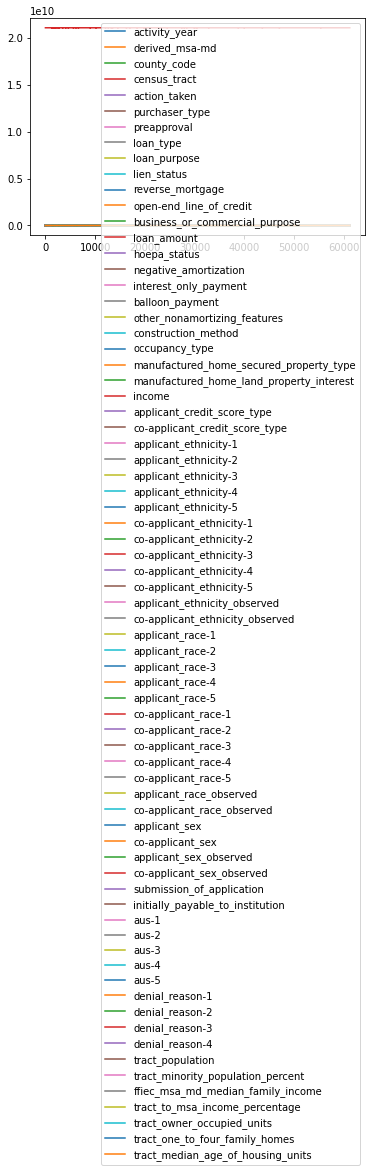

In [ ]:
house_df.plot()

In [ ]:
house_df['aus-1'].plot.pie()

KeyError: ignored

#Summary

Base on 2007 Louisville Metro demographic information obtained from wikepedia home ownership is --- diverse compare to the overall city popuation:


**Racial Comparision**

City

74.8% white, 22.2% black, 0.6% American Indian, 2.0% Asian, 0.1% Hawaiian or Pacific islander, 1.4% other, and 1.6% multiracial. About 2.9% of the total population was identified as Hispanic of any race.

Home Ownership


**Sex of Head of Household**

City

For every 100 females age 18 and over, there were 87.60 males.

Home Ownership


**Age of Head of Household**

City

8.9% from 18 to 24, 30.4% from 25 to 44, 22.8% from 45 to 64, and 13.5% who were 65 years of age or older. The median age was 37 years. 

Home Ownership



**Income Comparison**

City

The median income for a household in 2017 was $51,960.

Home Ownership

Home owners were % over the median.  Within $10,000 of the median income home ownership was %%.  Below $10,000 of the median income home ownership was %%.
